<a href="https://colab.research.google.com/github/doctordoom101/Twitter-Sentiment-Analysis---Programming-Language-Lecturer-Final-Project/blob/main/Project_PL_Progress2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

dataset = '/content/drive/MyDrive/Datasets_projectPL/merged_dataset.csv'

df = pd.read_csv(dataset)
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1800576294473666667,Tue Jun 11 17:10:16 +0000 2024,0,Meet Dr. Perry Adler a clinical psychologist l...,1800576294473666667,NaN,NaN,en,3755 Côte St. Catherine,0,0,0,https://x.com/HGJF_JGHF/status/180057629447366...,1019274378465472514,HGJF_JGHF
1,1800573991423189121,Tue Jun 11 17:01:07 +0000 2024,0,As many parents know our teenage years while m...,1800573991423189121,NaN,NaN,en,Salt Lake City,0,0,0,https://x.com/TDEastSLC/status/180057399142318...,1479123078810529795,TDEastSLC
2,1800573990408180161,Tue Jun 11 17:01:07 +0000 2024,0,As many parents know our teenage years while m...,1800573990408180161,NaN,NaN,en,"Albuquerque, New Mexico",0,0,0,https://x.com/TutorDoctorNM/status/18005739904...,325886271,TutorDoctorNM
3,1800558605189406972,Tue Jun 11 15:59:58 +0000 2024,1,As many parents know our teenage years while m...,1800558605189406972,NaN,NaN,en,"Saint Peters, MO",0,0,0,https://x.com/CallMeDrMabie/status/18005586051...,1523750070,CallMeDrMabie
4,1800558603851514124,Tue Jun 11 15:59:58 +0000 2024,0,As many parents know our teenage years while m...,1800558603851514124,NaN,NaN,en,"Franklin, Tennessee",0,0,0,https://x.com/TutorsInHome/status/180055860385...,342916454,TutorsInHome


In [ ]:
df = df[['full_text']]
df

,full_text
0,Meet Dr. Perry Adler a clinical psychologist l...
1,As many parents know our teenage years while m...
2,As many parents know our teenage years while m...
3,As many parents know our teenage years while m...
4,As many parents know our teenage years while m...
...,...
6205,World Teen Mental Wellness Day highlights the ...
6206,Today is #WorldTeenMentalWellnessDay According...
6207,World Teen Mental Wellness Day was established...
6208,Talking with your child or teen about their me...


In [ ]:
df.shape

(6210, 1)

## Data duplications analysis

In [ ]:
# Check for duplicate rows based on 'full_text' columns
duplicate_twt = df[df.duplicated(subset='full_text')]
jumlah_baris_duplikat = len(duplicate_twt)

# counting data duplicate's percentage
persentase_duplikat = (jumlah_baris_duplikat / len(df)) * 100

# Print the number of duplicate rows
print("Number of duplicate rows\t:", len(duplicate_twt))
# print the percentage of duplicate rows
print("duplicated data percentage\t:", persentase_duplikat, "%")

# ---------------------------------------------------------------

# check for non-duplikat rows based on 'full_text' columns
jumlah_baris_real = len(df) - len(duplicate_twt)

# counting real data's percentage
persentase_real = (jumlah_baris_real / len(df)) * 100

# Print the number of non-duplicate rows
print("\nNumber of non-duplicate rows\t:", jumlah_baris_real)
# Print the percentage of non-duplicate rows
print("Data real percentage\t\t:", persentase_real, "%")

Number of duplicate rows	: 183
duplicated data percentage	: 2.9468599033816423 %

Number of non-duplicate rows	: 6027
Data real percentage		: 97.05314009661836 %


# Data Preprocessing

## 1. Cleaning

In [ ]:
df.shape

(6210, 1)

In [ ]:
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

full_text    0
dtype: int64

In [ ]:
df.shape

(6027, 1)

In [ ]:
def clean_twitter_text(text):
  """
  This function cleans text data scraped from Twitter.

  Args:
      text: The text data to be cleaned.

  Returns:
      The cleaned text data.
  """

  # Remove mentions (@username)
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)

  # Remove RT (Retweet) indicators and extra spaces
  text = re.sub(r'RT [\s]+', '', text)

  # Remove hashtags
  text = re.sub(r'#\w+',' ', text)  # Note the space after the '#' symbol

  # Remove URLs
  text = re.sub(r'https?://\S+',' ', text)

  # Remove extra spaces and leading/trailing spaces
  text = text.strip().replace('  ', ' ')  # Replace multiple spaces with a single space

  # Remove non-alphanumeric characters (except for space)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)

  return text

# Apply the cleaning function to a DataFrame column named 'full_text'
df['full_text'] = df['full_text'].apply(clean_twitter_text)


In [ ]:
# df.to_csv('/content/drive/MyDrive/Datasets_projectPL/1_cleaning.csv', index=False)

## 2. Case folding

In [ ]:
df['full_text'] = df['full_text'].str.lower()

In [ ]:
df

,full_text
0,meet dr perry adler a clinical psychologist le...
1,as many parents know our teenage years while m...
2,as many parents know our teenage years while m...
3,as many parents know our teenage years while m...
4,as many parents know our teenage years while m...
...,...
6205,world teen mental wellness day highlights the ...
6206,today is according to who 1 in 7 people betwe...
6207,world teen mental wellness day was established...
6208,talking with your child or teen about their me...


In [ ]:
# df.to_csv('/content/drive/MyDrive/Datasets_projectPL/2_CaseFolding.csv', index=False)

## 3. Normalization

In [ ]:
norm = {" u ":" you ", " ur ":" your ", " urself ":" yourself ", " im ":" i am ", " gonna ":" going to ", " wanna ":" want to ", " lol ":" ", " rofl ":" ", " btw ":" ", " cuz ":" because "}

def normalize(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalize(x))
df

,full_text
0,meet dr perry adler a clinical psychologist le...
1,as many parents know our teenage years while m...
2,as many parents know our teenage years while m...
3,as many parents know our teenage years while m...
4,as many parents know our teenage years while m...
...,...
6205,world teen mental wellness day highlights the ...
6206,today is according to who 1 in 7 people betwe...
6207,world teen mental wellness day was established...
6208,talking with your child or teen about their me...


In [ ]:
# df.to_csv('/content/drive/MyDrive/Datasets_projectPL/3_Normalization.csv', index=False)

## 4. Stopwords (with nltk)

In [ ]:
import nltk

# Download and load the stop words list
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Additional stop words (optional)
more_stop_words = ["a", "an", "the", "in", "on", "of"]
stop_words.update(more_stop_words)

def stopword(str_text):
  words = str_text.split()  # Split the text into individual words
  filtered_words = [word for word in words if word not in stop_words]  # Remove stop words
  return ' '.join(filtered_words)  # Join the filtered words back into a string

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text
0,meet dr perry adler clinical psychologist lead...
1,many parents know teenage years memorable exci...
2,many parents know teenage years memorable exci...
3,many parents know teenage years memorable exci...
4,many parents know teenage years memorable exci...
...,...
6205,world teen mental wellness day highlights need...
6206,today according 1 7 people ages 10 19 currentl...
6207,world teen mental wellness day established rai...
6208,talking child teen mental health may feel unco...


In [ ]:
# df.to_csv('/content/drive/MyDrive/Datasets_projectPL/4_stopwords.csv', index=False)

## 5. Tokenize

In [ ]:
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0       [meet, dr, perry, adler, clinical, psychologis...
1       [many, parents, know, teenage, years, memorabl...
2       [many, parents, know, teenage, years, memorabl...
3       [many, parents, know, teenage, years, memorabl...
4       [many, parents, know, teenage, years, memorabl...
                              ...                        
6205    [world, teen, mental, wellness, day, highlight...
6206    [today, according, 1, 7, people, ages, 10, 19,...
6207    [world, teen, mental, wellness, day, establish...
6208    [talking, child, teen, mental, health, may, fe...
6209    [world, teen, mental, wellness, day, aims, nor...
Name: full_text, Length: 6027, dtype: object

In [ ]:
# tokenized.to_csv('/content/drive/MyDrive/Datasets_projectPL/5_Tokenized.csv', index=False)

## 6. Stemming

In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Download the Porter Stemmer (if not already downloaded)
nltk.download('punkt')  # Download sentence tokenizer for PorterStemmer

def stemming(text):
  stemmer = PorterStemmer()
  words = text.split()  # Split the text into individual words
  stemmed_words = [stemmer.stem(word) for word in words]  # Apply stemming to each word
  return ' '.join(stemmed_words)  # Join the stemmed words back into a string

df['full_text'] = df['full_text'].apply(lambda x: stemming(x))

df.to_csv("/content/drive/MyDrive/Datasets_projectPL/hasilPreprocessing.csv", index=False)
data = pd.read_csv("/content/drive/MyDrive/Datasets_projectPL/hasilPreprocessing.csv", encoding='latin1')  # Optional encoding argument


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets_projectPL/hasilPreprocessing.csv")
data.head()

,full_text
0,meet dr perri adler clinic psychologist lead j...
1,mani parent know teenag year memor excit also ...
2,mani parent know teenag year memor excit also ...
3,mani parent know teenag year memor excit also ...
4,mani parent know teenag year memor excit also ...


## 7. Labelling

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Function to handle potential non-string values in tweets
def clean_tweet(tweet):
  """
  This function attempts to convert the tweet to a string
  and returns an empty string if conversion fails.
  """
  try:
    return str(tweet)
  except:
    return ""

# Create an empty list to store sentiment labels
status = []

polaritas = 0

# Initialize sentiment counters
total_positif = total_negatif = total_netral = total = 0

# Extract tweets and clean them
data_tweet = [clean_tweet(tweet) for tweet in data['full_text']]

# Sentiment analysis loop with error handling
for i, tweet in enumerate(data_tweet):
  try:
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.polarity > 0:  # Adjust threshold for positive sentiment (optional)
      total_positif += 1
      status.append('positif')
    elif analysis.polarity == 0:
      total_netral += 1
      status.append('netral')
    else:
      total_negatif += 1
      status.append('negatif')

  except:
    # Handle potential errors during TextBlob analysis (e.g., empty tweets)
    print(f"Error processing tweet {i+1}")
    status.append("error")

  total += 1

# Print results
print(f'Hasil Analisis Data:\nPositif: {total_positif}\nNegatif: {total_negatif}\nNetral: {total_netral}')
print(f'Total Tweet: {total}')

# Optional: Add status list to your DataFrame (if needed)
# data['sentiment'] = status

Hasil Analisis Data:
Positif: 2108
Negatif: 3367
Netral: 552
Total Tweet: 6027


In [ ]:
data['klasifikasi'] = status
data

,full_text,klasifikasi
0,meet dr perri adler clinic psychologist lead j...,negatif
1,mani parent know teenag year memor excit also ...,netral
2,mani parent know teenag year memor excit also ...,netral
3,mani parent know teenag year memor excit also ...,netral
4,mani parent know teenag year memor excit also ...,netral
...,...,...
6022,world teen mental well day highlight need incl...,negatif
6023,today accord 1 7 peopl age 10 19 current exper...,negatif
6024,world teen mental well day establish rais awar...,negatif
6025,talk child teen mental health may feel uncomfo...,negatif


In [ ]:
data = data.dropna(subset=['full_text'])  # Remove rows with NaN in 'full_text'
data

,full_text,klasifikasi
0,meet dr perri adler clinic psychologist lead j...,negatif
1,mani parent know teenag year memor excit also ...,netral
2,mani parent know teenag year memor excit also ...,netral
3,mani parent know teenag year memor excit also ...,netral
4,mani parent know teenag year memor excit also ...,netral
...,...,...
6022,world teen mental well day highlight need incl...,negatif
6023,today accord 1 7 peopl age 10 19 current exper...,negatif
6024,world teen mental well day establish rais awar...,negatif
6025,talk child teen mental health may feel uncomfo...,negatif


In [ ]:
print(data.isna().sum())

full_text      0
klasifikasi    0
dtype: int64


In [ ]:
data.to_csv('/content/drive/MyDrive/Datasets_projectPL/hasil_labelling.csv', index=False)

## 8. Visualisasi

In [ ]:
!pip install wordcloud

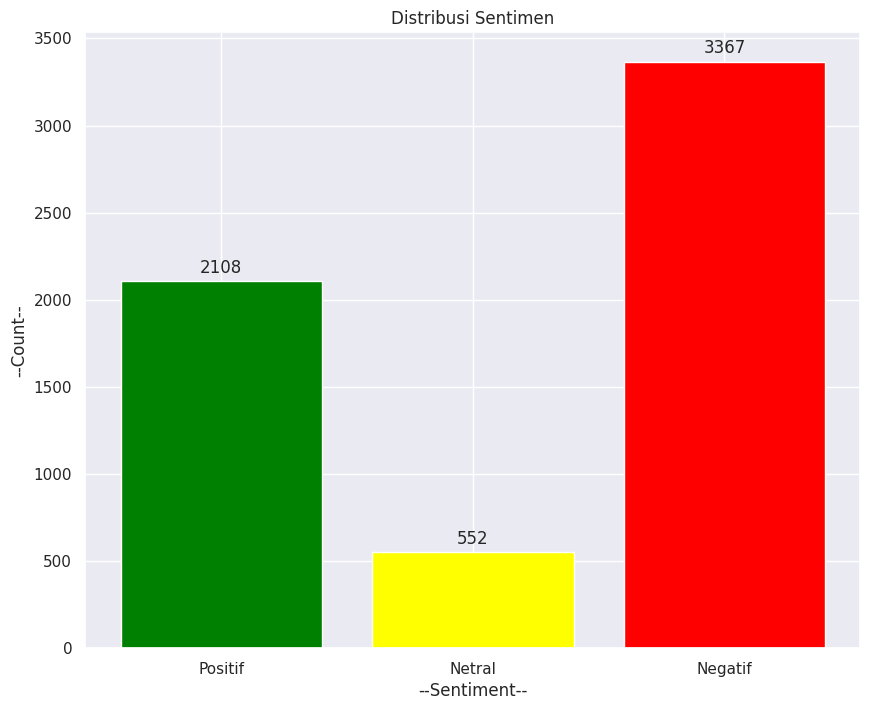

In [ ]:
import seaborn as sns

sns.set(style="darkgrid")

labels = ['Positif', 'Netral', 'Negatif']
counts = [total_positif, total_netral, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    bars = ax.bar(labels, counts, color=['green', 'yellow', 'red'])
    for bar, count in zip(bars, counts):
      height = bar.get_height()
      ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
      textcoords='offset points', ha='center', va='bottom')
    ax.set_title(title)
    ax.set_xlabel('--Sentiment--')
    ax.set_ylabel('--Count--')
    plt.show()

show_bar_chart(labels, counts, 'Distribusi Sentimen')